In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# Load all of the saved files
train_feat = np.loadtxt('train_feat.gzip', dtype = 'float')
gallery_feat = np.loadtxt('gallery_feat.gzip', dtype = 'float')
query_feat = np.loadtxt('query_feat.gzip', dtype = 'float')
val_feat = np.loadtxt('val_feat.gzip', dtype = 'float')
train_noval_feat = np.loadtxt('train_noval_feat.gzip', dtype = 'float')
train_labels = np.loadtxt('train_labels.gzip', dtype = 'uint16')
gallery_labels = np.loadtxt('gallery_labels.gzip', dtype = 'uint16')
query_labels = np.loadtxt('query_labels.gzip', dtype = 'uint16')
val_labels = np.loadtxt('val_labels.gzip', dtype = 'uint16')
train_noval_labels = np.loadtxt('train_noval_labels.gzip', dtype = 'uint16')
#train_filelist = np.loadtxt('train_filelist.gzip', dtype = 'uint16')
#gallery_filelist = np.loadtxt('gallery_filelist.gzip', dtype = 'uint16')
#query_filelist = np.loadtxt('query_filelist.gzip', dtype = 'uint16')
#val_filelist = np.loadtxt('val_filelist.gzip', dtype = 'uint16')
#train_noval_filelist = np.loadtxt('train_noval_filelist.gzip', dtype = 'uint16')
train_camId = np.loadtxt('train_camId.gzip', dtype = 'uint16') # uint8
gallery_camId = np.loadtxt('gallery_camId.gzip', dtype = 'uint16')
query_camId = np.loadtxt('query_camId.gzip', dtype = 'uint16')
val_camId = np.loadtxt('val_camId.gzip', dtype = 'uint16')
train_noval_camId = np.loadtxt('train_noval_camId.gzip', dtype = 'uint16')

In [3]:
# Function that takes as input an index that refers to a query image
# and returns the gallery without the unnecessary pictures in it
# Remove the pictures from the gallery that have the same label and are taken by the same camera as out QUERY[index]
# picture in the query array
def get_removed_gallery (index):
    selected_indices = np.logical_not(np.logical_and(gallery_camId == query_camId[index], gallery_labels == query_labels[index]))
    return gallery_feat[selected_indices, :], gallery_labels[selected_indices]

In [4]:
# k nearest neighbours implementation
k = 10
top_k_accuracies_rank = np.zeros((query_labels.shape[0],k))
top_k_accuracies_classical = np.zeros((query_labels.shape[0],k))
top_k_accuracies_recall = np.zeros((query_labels.shape[0],k))

for i in range (0, query_labels.shape[0], 1):
    gallery_feat_removed, gallery_labels_removed = get_removed_gallery (i)
    nbrs = NearestNeighbors(n_neighbors=k).fit(gallery_feat_removed)
    distances, indices = nbrs.kneighbors(query_feat[i:i+1, :])
    print(gallery_labels_removed[indices], query_labels[i])
    is_same_label = (query_labels[i] == gallery_labels_removed[indices])
    print (is_same_label)
    
    for j in range (0, k, 1):
        print(j)
        print (is_same_label[0, :(j+1)])
        top_k_accuracies_rank[i,j] = np.sum(is_same_label[0, :(j+1)]) != 0
        top_k_accuracies_classical[i,j]=np.sum(is_same_label[0, :(j+1)])/(j+1)
        top_k_accuracies_recall[i,j] = np.sum(is_same_label[0, :(j+1)])/np.sum(gallery_labels_removed==query_labels[i])
        print (top_k_accuracies_rank[i,j])
         print (top_k_accuracies_classical[i,j])
        print (top_k_accuracies_recall[i,j])
print (top_k_accuracies_rank[:, 0].mean())
print (top_k_accuracies_classical[:, 0].mean())
print (top_k_accuracies_recall[:, 0].mean())

[[1368  739 1426   51 1368   14   14 1450   51 1368]] 3
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[ 517  235  235 1426  725   86   51 1426  172    3]] 3
[[False False False False False False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.

[[ 22  22  22 303 319 303 319 303 780 319]] 22
[[ True  True  True False False False False False False False]]
0
[ True]
1.0
1.0
0.3333333333333333
1
[ True  True]
1.0
1.0
0.6666666666666666
2
[ True  True  True]
1.0
1.0
1.0
3
[ True  True  True False]
1.0
0.75
1.0
4
[ True  True  True False False]
1.0
0.6
1.0
5
[ True  True  True False False False]
1.0
0.5
1.0
6
[ True  True  True False False False False]
1.0
0.42857142857142855
1.0
7
[ True  True  True False False False False False]
1.0
0.375
1.0
8
[ True  True  True False False False False False False]
1.0
0.3333333333333333
1.0
9
[ True  True  True False False False False False False False]
1.0
0.3
1.0
[[723 723  28 723  28  28 723 143 723 562]] 28
[[False False  True False  True  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True False]
1.0
0.25
0.25
4
[False False  True False  True]
1.0
0.4
0.5
5
[False False  True False  True  Tr

[[ 38 750  38  38  38 160 160 750 592 160]] 38
[[ True False  True  True  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True  True]
1.0
0.75
0.75
4
[ True False  True  True  True]
1.0
0.8
1.0
5
[ True False  True  True  True False]
1.0
0.6666666666666666
1.0
6
[ True False  True  True  True False False]
1.0
0.5714285714285714
1.0
7
[ True False  True  True  True False False False]
1.0
0.5
1.0
8
[ True False  True  True  True False False False False]
1.0
0.4444444444444444
1.0
9
[ True False  True  True  True False False False False False]
1.0
0.4
1.0
[[  38   38  750   38   38  160  160 1384  786  145]] 38
[[ True  True False  True  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True  True]
1.0
0.8
1.0
5
[ True  True False  True

[[  51   51   51   51 1450    3  650    3 1450 1450]] 51
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[373  69  69 757 373  69  69  45 552 566]] 54
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False 

[[564 548  68 564  54 548 564 170 704 564]] 69
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[ 255  255  255  255  255  232  310 1009  255   69]] 69
[[False False False False False False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.

[[  78   78   78   78  670  670 1431  916  532  532]] 78
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[ 80 435 435 435  80  80 435 435  89 762]] 80
[[ True False False False  True  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False  True]
1.0
0.4
0.5
5
[ True False False False  True  True]
1

[[635 239 239 239 635 235 254 635 239 254]] 98
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[239 239 635 239 239 254  98  98 254 445]] 98
[[False False False False False False  True  True False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False  True]
1.0
0.14285714285714

[[107 537 537 505 165 536 165 754 530 530]] 107
[[ True False False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False False False False]
1.0
0.16666666666666666
0.25
6
[ True False False False False False False]
1.0
0.14285714285714285
0.25
7
[ True False False False False False False False]
1.0
0.125
0.25
8
[ True False False False False False False False False]
1.0
0.1111111111111111
0.25
9
[ True False False False False False False False False False]
1.0
0.1
0.25
[[666 111 111 304 111 213 666 744 151 751]] 111
[[False  True  True False  True False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True  True]
1.0
0.6666666666666666
0.5
3
[False  True  True False]
1.0
0.5
0.5
4
[False  True  True False  True]
1.0
0.6
0.75
5
[False  True  True Fal

[[121 121 578 923 578 558 923 558 578 923]] 121
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False False False False False]
1.0
0.2857142857142857
0.5
7
[ True  True False False False False False False]
1.0
0.25
0.5
8
[ True  True False False False False False False False]
1.0
0.2222222222222222
0.5
9
[ True  True False False False False False False False False]
1.0
0.2
0.5
[[ 121  121  121 1187 1187  558 1187  599  558  653]] 121
[[ True  True  True False False False False False False False]]
0
[ True]
1.0
1.0
0.3333333333333333
1
[ True  True]
1.0
1.0
0.6666666666666666
2
[ True  True  True]
1.0
1.0
1.0
3
[ True  True  True False]
1.0
0.75
1.0
4
[ True  True  True False False]
1.0
0.6
1.0
5
[ True  Tru

[[ 278  175  175  175  496  175  419 1305  175  278]] 133
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[134 134 773 212 212 773 474 682 569 212]] 134
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False Fa

[[673 146 146 146 649 146 673 673 673 673]] 146
[[False  True  True  True False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True  True]
1.0
0.6666666666666666
0.5
3
[False  True  True  True]
1.0
0.75
0.75
4
[False  True  True  True False]
1.0
0.6
0.75
5
[False  True  True  True False  True]
1.0
0.6666666666666666
1.0
6
[False  True  True  True False  True False]
1.0
0.5714285714285714
1.0
7
[False  True  True  True False  True False False]
1.0
0.5
1.0
8
[False  True  True  True False  True False False False]
1.0
0.4444444444444444
1.0
9
[False  True  True  True False  True False False False False]
1.0
0.4
1.0
[[673 673 673 673 649 649 661 649 673 649]] 146
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0


[[152 152 152 152 429 467 429 435 817 467]] 152
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[374 448 448 156 448 374 521 521 675 220]] 156
[[False False False  True False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True False]
1.0
0.2
0.25
5
[False False False  True False False]
1.0
0.16666666666666666
0.

[[349 232 232 424  42 666 216 232 548 548]] 164
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[ 360  360  423  129  423  360  423  424  423 1179]] 164
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0


[[419 335 335 335 175 335 190 175 175 419]] 175
[[False False False False  True False False  True  True False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False  True]
1.0
0.2
0.25
5
[False False False False  True False]
1.0
0.16666666666666666
0.25
6
[False False False False  True False False]
1.0
0.14285714285714285
0.25
7
[False False False False  True False False  True]
1.0
0.25
0.5
8
[False False False False  True False False  True  True]
1.0
0.3333333333333333
0.75
9
[False False False False  True False False  True  True False]
1.0
0.3
0.75
[[175 190 190 419 175 190 429 429 190 469]] 175
[[ True False False False  True False False False False False]]
0
[ True]
1.0
1.0
0.3333333333333333
1
[ True False]
1.0
0.5
0.3333333333333333
2
[ True False False]
1.0
0.3333333333333333
0.3333333333333333
3
[ True False False False]
1.0
0.25
0.3333333333333333
4
[ True False False False  True]

[[ 187  187  187 1307  202  259  259  397 1307  259]] 187
[[ True  True  True False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]
1.0
0.5
0.75
6
[ True  True  True False False False False]
1.0
0.42857142857142855
0.75
7
[ True  True  True False False False False False]
1.0
0.375
0.75
8
[ True  True  True False False False False False False]
1.0
0.3333333333333333
0.75
9
[ True  True  True False False False False False False False]
1.0
0.3
0.75
[[190 175 609 419 190 609 190 175 175 175]] 190
[[ True False False False  True False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False  True]
1.0
0.4
0.5
5
[ True False False False  True False]
1.0

[[205 205 670 670 542 542 182 661 205 193]] 205
[[ True  True False False False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False False False False False]
1.0
0.2857142857142857
0.5
7
[ True  True False False False False False False]
1.0
0.25
0.5
8
[ True  True False False False False False False  True]
1.0
0.3333333333333333
0.75
9
[ True  True False False False False False False  True False]
1.0
0.3
0.75
[[205 213 205 213 213 862 822 241 129 205]] 205
[[ True False  True False False False False False False  True]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True False]
1.0
0.5
0.5
4
[ True False  True False False]
1.0
0.4
0.5
5
[ True False  True False False Fa

[[217 217 557 217 557 423 217 566 557 566]] 217
[[ True  True False  True False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True False]
1.0
0.6
0.75
5
[ True  True False  True False False]
1.0
0.5
0.75
6
[ True  True False  True False False  True]
1.0
0.5714285714285714
1.0
7
[ True  True False  True False False  True False]
1.0
0.5
1.0
8
[ True  True False  True False False  True False False]
1.0
0.4444444444444444
1.0
9
[ True  True False  True False False  True False False False]
1.0
0.4
1.0
[[ 218 1365  218 1365 1134  103  452  870  471  103]] 218
[[ True False  True False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True False]
1.0
0.5
0.5
4
[ True False  True False False]
1.0
0.4
0.5
5
[ True False  True False False False]

[[227 227 227 227 932 932 932 932 932 932]] 227
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[227 227 227 227 932 932 932 932 932 932]] 227
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0


[[236  41 250 250 250 250 236 250 250 250]] 236
[[ True False False False False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False False False False]
1.0
0.16666666666666666
0.25
6
[ True False False False False False  True]
1.0
0.2857142857142857
0.5
7
[ True False False False False False  True False]
1.0
0.25
0.5
8
[ True False False False False False  True False False]
1.0
0.2222222222222222
0.5
9
[ True False False False False False  True False False False]
1.0
0.2
0.5
[[237 237 331 237 331 331 780 340 237 331]] 237
[[ True  True False  True False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True False]
1.0
0.6
0.75
5
[ True  True False  True F

[[ 32  32  32 247 247  32  32 674 570 247]] 247
[[False False False  True  True False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True  True]
1.0
0.4
0.5
5
[False False False  True  True False]
1.0
0.3333333333333333
0.5
6
[False False False  True  True False False]
1.0
0.2857142857142857
0.5
7
[False False False  True  True False False False]
1.0
0.25
0.5
8
[False False False  True  True False False False False]
1.0
0.2222222222222222
0.5
9
[False False False  True  True False False False False  True]
1.0
0.3
0.75
[[ 826  763  826  247  321 1190  321  321  826  763]] 247
[[False False False  True False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True False]
1.0
0.2
0.25
5
[False False False  True False False]
1.0
0.16666666

[[ 259  259  202 1307  187  695  187 1225 1307  187]] 259
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.5
1
[ True  True]
1.0
1.0
1.0
2
[ True  True False]
1.0
0.6666666666666666
1.0
3
[ True  True False False]
1.0
0.5
1.0
4
[ True  True False False False]
1.0
0.4
1.0
5
[ True  True False False False False]
1.0
0.3333333333333333
1.0
6
[ True  True False False False False False]
1.0
0.2857142857142857
1.0
7
[ True  True False False False False False False]
1.0
0.25
1.0
8
[ True  True False False False False False False False]
1.0
0.2222222222222222
1.0
9
[ True  True False False False False False False False False]
1.0
0.2
1.0
[[261 261 261 648 648  40 836 816 836 261]] 261
[[ True  True  True False False False False False False  True]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]


[[409 409 409 278 818 278 716 716 372 818]] 278
[[False False False  True False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True False]
1.0
0.2
0.25
5
[False False False  True False  True]
1.0
0.3333333333333333
0.5
6
[False False False  True False  True False]
1.0
0.2857142857142857
0.5
7
[False False False  True False  True False False]
1.0
0.25
0.5
8
[False False False  True False  True False False False]
1.0
0.2222222222222222
0.5
9
[False False False  True False  True False False False False]
1.0
0.2
0.5
[[278 335 133 133 335 335 335 818 133 335]] 278
[[ True False False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False False False False]
1.0
0.

[[367 294 335 294 545 401 721 738 367 213]] 294
[[False  True False  True False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False  True]
1.0
0.5
0.5
4
[False  True False  True False]
1.0
0.4
0.5
5
[False  True False  True False False]
1.0
0.3333333333333333
0.5
6
[False  True False  True False False False]
1.0
0.2857142857142857
0.5
7
[False  True False  True False False False False]
1.0
0.25
0.5
8
[False  True False  True False False False False False]
1.0
0.2222222222222222
0.5
9
[False  True False  True False False False False False False]
1.0
0.2
0.5
[[672 672 652 258 672 159 672 159 652 156]] 296
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6

[[669 586 669 669 643 586 310 757 705 310]] 310
[[False False False False False False  True False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False  True]
1.0
0.14285714285714285
0.25
7
[False False False False False False  True False]
1.0
0.125
0.25
8
[False False False False False False  True False False]
1.0
0.1111111111111111
0.25
9
[False False False False False False  True False False  True]
1.0
0.2
0.5
[[669 706 310 310 310 697 669 706 757 706]] 310
[[False False  True  True  True False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True  True]
1.0
0.5
0.5
4
[False False  True  True  True]
1.0
0.6
0.75
5
[False False  True  True  True False]
1.0
0.5
0.75
6
[False F

[[ 322  322  322  322  345  674  266 1354  266  345]] 322
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[710 325 351 625 351 351 351 325 625 448]] 325
[[False  True False False False False False  True False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False False]
1.0
0.25
0.25
4
[False  True False False False]
1.0
0.2
0.25
5
[False  True False False False False]

[[335 335 335 335 692 294 278 133 133 692]] 335
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[133 278 278 175 175 335 133 278 335 133]] 335
[[False False False False False  True False False  True False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False  True]
1.0
0.16666666666666666
0.25


[[  72   72  345   72  345  345 1022   72 1022  804]] 345
[[False False  True False  True  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True False]
1.0
0.25
0.25
4
[False False  True False  True]
1.0
0.4
0.5
5
[False False  True False  True  True]
1.0
0.5
0.75
6
[False False  True False  True  True False]
1.0
0.42857142857142855
0.75
7
[False False  True False  True  True False False]
1.0
0.375
0.75
8
[False False  True False  True  True False False False]
1.0
0.3333333333333333
0.75
9
[False False  True False  True  True False False False False]
1.0
0.3
0.75
[[ 346  346  346  346  381 1312  699  381  452  749]] 346
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False

[[361 361 361 463 463 485 463 423 361 463]] 361
[[ True  True  True False False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]
1.0
0.5
0.75
6
[ True  True  True False False False False]
1.0
0.42857142857142855
0.75
7
[ True  True  True False False False False False]
1.0
0.375
0.75
8
[ True  True  True False False False False False  True]
1.0
0.4444444444444444
1.0
9
[ True  True  True False False False False False  True False]
1.0
0.4
1.0
[[361 170 361 361 361 162 530 463 162 162]] 361
[[ True False  True  True  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True  True]
1.0
0.75
0.75
4
[ True False  True  True  True]
1.0
0.8
1.0
5
[ True False  True  True  True False]
1.0
0.6666666666

[[373 373  54  54 744  54 228 504  54 170]] 373
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False False False False False]
1.0
0.2857142857142857
0.5
7
[ True  True False False False False False False]
1.0
0.25
0.5
8
[ True  True False False False False False False False]
1.0
0.2222222222222222
0.5
9
[ True  True False False False False False False False False]
1.0
0.2
0.5
[[448 374 448 448 448 374 194 194 521 194]] 374
[[False  True False False False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False False]
1.0
0.25
0.25
4
[False  True False False False]
1.0
0.2
0.25
5
[False  True False False False  

[[521 367 521 367 521 401 367 367 763 374]] 382
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[367 367 763 471 521 367 471 471 521 374]] 382
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[Fal

[[397 397 397 397 730 730 376 376 376 730]] 397
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[398 398 398 758 398 397 388 454 758 488]] 398
[[ True  True  True False  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False  True]
1.0
0.8
1.0
5
[ True  True  True False  True False]
1.0
0.6666666666666666
1.

[[33 33 33 33 33 70 70 70 33 70]] 408
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[378 378 378 408 242 394  33 242 365  33]] 408
[[False False False  True False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.5
4
[False False False  True False]
1.0
0.2
0.5
5
[False False False  True False False]
1.0
0.16666666666666666
0.5
6
[False False False  True False False False]
1.0
0.14285

[[590 475 441 422 475 422 461 422 423 361]] 422
[[False False False  True False  True False  True False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True False]
1.0
0.2
0.25
5
[False False False  True False  True]
1.0
0.3333333333333333
0.5
6
[False False False  True False  True False]
1.0
0.2857142857142857
0.5
7
[False False False  True False  True False  True]
1.0
0.375
0.75
8
[False False False  True False  True False  True False]
1.0
0.3333333333333333
0.75
9
[False False False  True False  True False  True False False]
1.0
0.3
0.75
[[ 41  41 542  41  41 542  42 236  42  41]] 423
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False Fa

[[435 435  80 435 435  80  80  80  89  89]] 435
[[ True  True False  True  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True  True]
1.0
0.8
1.0
5
[ True  True False  True  True False]
1.0
0.6666666666666666
1.0
6
[ True  True False  True  True False False]
1.0
0.5714285714285714
1.0
7
[ True  True False  True  True False False False]
1.0
0.5
1.0
8
[ True  True False  True  True False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True False  True  True False False False False False]
1.0
0.4
1.0
[[435 435 435  80 435  80  80  89 488  80]] 435
[[ True  True  True False  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False  True]
1.0
0.8
1.0
5
[ True  True  True False  True False]
1.0
0.666

[[584 384 584 556  74  74 390 545 384 409]] 448
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[450 450 450 655 696 450 696 696 655 903]] 450
[[ True  True  True False False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False  True]
1.0
0.6666666666666666
1.0
6
[ True  True  True False False  True False

[[ 367  459  459  367  367  367  459  367 1372  376]] 459
[[False  True  True False False False  True False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True  True]
1.0
0.6666666666666666
0.5
3
[False  True  True False]
1.0
0.5
0.5
4
[False  True  True False False]
1.0
0.4
0.5
5
[False  True  True False False False]
1.0
0.3333333333333333
0.5
6
[False  True  True False False False  True]
1.0
0.42857142857142855
0.75
7
[False  True  True False False False  True False]
1.0
0.375
0.75
8
[False  True  True False False False  True False False]
1.0
0.3333333333333333
0.75
9
[False  True  True False False False  True False False False]
1.0
0.3
0.75
[[519 487 487 519 519 425 459 367 471 471]] 459
[[False False False False False False  True False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False

[[467 467 529 159 454 529 529 490 490 159]] 467
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False False False False False]
1.0
0.2857142857142857
0.5
7
[ True  True False False False False False False]
1.0
0.25
0.5
8
[ True  True False False False False False False False]
1.0
0.2222222222222222
0.5
9
[ True  True False False False False False False False False]
1.0
0.2
0.5
[[186 469 366 366 469 365 175 366 469 366]] 469
[[False  True False False  True False False False  True False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False False]
1.0
0.25
0.25
4
[False  True False False  True]
1.0
0.4
0.5
5
[False  True False False  True Fa

[[485 464 485 485 536 485 536 365 464 365]] 485
[[ True False  True  True False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True  True]
1.0
0.75
0.75
4
[ True False  True  True False]
1.0
0.6
0.75
5
[ True False  True  True False  True]
1.0
0.6666666666666666
1.0
6
[ True False  True  True False  True False]
1.0
0.5714285714285714
1.0
7
[ True False  True  True False  True False False]
1.0
0.5
1.0
8
[ True False  True  True False  True False False False]
1.0
0.4444444444444444
1.0
9
[ True False  True  True False  True False False False False]
1.0
0.4
1.0
[[485 536 536 165 485 165 485 536 165 485]] 485
[[ True False False False  True False  True False False  True]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False  True]
1.0
0.4
0.5
5
[ True False False False  Tru

[[ 76 133 496 133 496 388  76 423 473 496]] 496
[[False False  True False  True False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True False]
1.0
0.25
0.25
4
[False False  True False  True]
1.0
0.4
0.5
5
[False False  True False  True False]
1.0
0.3333333333333333
0.5
6
[False False  True False  True False False]
1.0
0.2857142857142857
0.5
7
[False False  True False  True False False False]
1.0
0.25
0.5
8
[False False  True False  True False False False False]
1.0
0.2222222222222222
0.5
9
[False False  True False  True False False False False  True]
1.0
0.3
0.75
[[499 499 499 849 884 499 337  60 547  60]] 499
[[ True  True  True False False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False  True]
1.0
0.

[[267 518 767 559 267 767 187 517 149 518]] 518
[[False  True False False False False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False False]
1.0
0.25
0.25
4
[False  True False False False]
1.0
0.2
0.25
5
[False  True False False False False]
1.0
0.16666666666666666
0.25
6
[False  True False False False False False]
1.0
0.14285714285714285
0.25
7
[False  True False False False False False False]
1.0
0.125
0.25
8
[False  True False False False False False False False]
1.0
0.1111111111111111
0.25
9
[False  True False False False False False False False  True]
1.0
0.2
0.5
[[518 518 496 496 152 496 187 267 518 635]] 518
[[ True  True False False False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False 

[[529 529 467 467 301 467 609 750 105 762]] 529
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False False False False False]
1.0
0.2857142857142857
0.5
7
[ True  True False False False False False False]
1.0
0.25
0.5
8
[ True  True False False False False False False False]
1.0
0.2222222222222222
0.5
9
[ True  True False False False False False False False False]
1.0
0.2
0.5
[[530 530 523 171 171 171 530 530 171 523]] 530
[[ True  True False False False False  True  True False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False

[[148 148 625 751 148 147 691 744 625 304]] 544
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[148 147 310 148 623 232 147 672 147 669]] 544
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[Fal

[[429 556 429 419 429 429 556 556 419 556]] 556
[[False  True False False False False  True  True False  True]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False False]
1.0
0.25
0.25
4
[False  True False False False]
1.0
0.2
0.25
5
[False  True False False False False]
1.0
0.16666666666666666
0.25
6
[False  True False False False False  True]
1.0
0.2857142857142857
0.5
7
[False  True False False False False  True  True]
1.0
0.375
0.75
8
[False  True False False False False  True  True False]
1.0
0.3333333333333333
0.75
9
[False  True False False False False  True  True False  True]
1.0
0.4
1.0
[[429 429 556 429 429 429 429 522 556 429]] 556
[[False False  True False False False False False  True False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True False]
1.0
0.25
0.25
4
[False False  True False False]
1.0
0.2
0.25
5
[False False  True False

[[564 564 373 754 548 754 564 557  69 704]] 564
[[ True  True False False False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False False False False  True]
1.0
0.42857142857142855
0.75
7
[ True  True False False False False  True False]
1.0
0.375
0.75
8
[ True  True False False False False  True False False]
1.0
0.3333333333333333
0.75
9
[ True  True False False False False  True False False False]
1.0
0.3
0.75
[[566 566 557 557 217 557 460 555 460 555]] 566
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False

[[652 584  32 584 652 584 343 343 882  32]] 584
[[False  True False  True False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False  True]
1.0
0.5
0.5
4
[False  True False  True False]
1.0
0.4
0.5
5
[False  True False  True False  True]
1.0
0.5
0.75
6
[False  True False  True False  True False]
1.0
0.42857142857142855
0.75
7
[False  True False  True False  True False False]
1.0
0.375
0.75
8
[False  True False  True False  True False False False]
1.0
0.3333333333333333
0.75
9
[False  True False  True False  True False False False False]
1.0
0.3
0.75
[[584 593 584 584 545 584 545 487 448 738]] 584
[[ True False  True  True False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True  True]
1.0
0.75
0.75
4
[ True False  True  True False]
1.0
0.6
0.75
5
[ True False  True  True False  True]
1

[[325 594  96 594 448 594 594 194 194  96]] 594
[[False  True False  True False  True  True False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False  True]
1.0
0.5
0.5
4
[False  True False  True False]
1.0
0.4
0.5
5
[False  True False  True False  True]
1.0
0.5
0.75
6
[False  True False  True False  True  True]
1.0
0.5714285714285714
1.0
7
[False  True False  True False  True  True False]
1.0
0.5
1.0
8
[False  True False  True False  True  True False False]
1.0
0.4444444444444444
1.0
9
[False  True False  True False  True  True False False False]
1.0
0.4
1.0
[[716 223 326 716 250 223 326 326 223 223]] 597
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False F

[[643 643 643 333 623 623 749 749  74 749]] 623
[[False False False False  True  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False  True]
1.0
0.2
0.25
5
[False False False False  True  True]
1.0
0.3333333333333333
0.5
6
[False False False False  True  True False]
1.0
0.2857142857142857
0.5
7
[False False False False  True  True False False]
1.0
0.25
0.5
8
[False False False False  True  True False False False]
1.0
0.2222222222222222
0.5
9
[False False False False  True  True False False False False]
1.0
0.2
0.5
[[544 232 224 643 623 544 623 228 310 544]] 623
[[False False False False  True False  True False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False  True]
1.0
0.2
0.25
5
[False False False False  True False]
1.0
0.16666666666666666
0.25

[[645 645 645 645 537 544 537 236 703 537]] 645
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[645 645 645 645 537 537 544 475 475 537]] 645
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0


[[440 651 651  47 586 651 614 585 479 556]] 651
[[False  True  True False False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.3333333333333333
2
[False  True  True]
1.0
0.6666666666666666
0.6666666666666666
3
[False  True  True False]
1.0
0.5
0.6666666666666666
4
[False  True  True False False]
1.0
0.4
0.6666666666666666
5
[False  True  True False False  True]
1.0
0.5
1.0
6
[False  True  True False False  True False]
1.0
0.42857142857142855
1.0
7
[False  True  True False False  True False False]
1.0
0.375
1.0
8
[False  True  True False False  True False False False]
1.0
0.3333333333333333
1.0
9
[False  True  True False False  True False False False False]
1.0
0.3
1.0
[[652 343 343 652 409 343 521 409 652 521]] 652
[[ True False False  True False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False  True]
1.0
0.5
0.5
4
[ True False False  True False]
1.

[[666 666 691 666 623 691  74  74 228 212]] 666
[[ True  True False  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True False]
1.0
0.6
0.75
5
[ True  True False  True False False]
1.0
0.5
0.75
6
[ True  True False  True False False False]
1.0
0.42857142857142855
0.75
7
[ True  True False  True False False False False]
1.0
0.375
0.75
8
[ True  True False  True False False False False False]
1.0
0.3333333333333333
0.75
9
[ True  True False  True False False False False False False]
1.0
0.3
0.75
[[111 304 111 111 325 488 136 111 136 488]] 666
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[Fals

[[156 156 156 780 780 409 780 159 159 390]] 675
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[  6 678 678 678 678   6 739 269 249   6]] 678
[[False  True  True  True  True False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True  True]
1.0
0.6666666666666666
0.5
3
[False  True  True  True]
1.0
0.75
0.75
4
[False  True  True  True  True]
1.0
0.8
1.0
5
[False  True  True  True  True False]
1.0
0.6666666666666666
1.0
6
[False  True  True  True  Tru

[[372 320 320 372 372 320 547 372 418 418]] 694
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[694 320 694 694 694 320 372 372 320 320]] 694
[[ True False  True  True  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True  True]
1.0
0.75
0.75
4
[ True False  True  True  True]
1.0
0.8
1.0
5
[ True False  True  True  True False]
1.0
0.6666666666666666
1.0
6
[ True False  True  True  Tr

[[704 704 564 564 564 704 616 745 704 661]] 704
[[ True  True False False False  True False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False  True]
1.0
0.5
0.75
6
[ True  True False False False  True False]
1.0
0.42857142857142855
0.75
7
[ True  True False False False  True False False]
1.0
0.375
0.75
8
[ True  True False False False  True False False  True]
1.0
0.4444444444444444
1.0
9
[ True  True False False False  True False False  True False]
1.0
0.4
1.0
[[ 705  419  705  544  159  705  544 1181  269  705]] 705
[[ True False  True False False  True False False False  True]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True False]
1.0
0.5
0.5
4
[ True False  True False False]
1.0
0.4
0.5
5
[ True False  True False False  Tru

[[ 717 1389 1389  558  655 1182  450  717 1182  655]] 717
[[ True False False False False False False  True False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False False False False]
1.0
0.16666666666666666
0.25
6
[ True False False False False False False]
1.0
0.14285714285714285
0.25
7
[ True False False False False False False  True]
1.0
0.25
0.5
8
[ True False False False False False False  True False]
1.0
0.2222222222222222
0.5
9
[ True False False False False False False  True False False]
1.0
0.2
0.5
[[ 717  717  717  717 1389 1389 1389 1182 1131 1389]] 717
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  T

[[726 726 249 726 254 726 249 635 249 445]] 726
[[ True  True False  True False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True False]
1.0
0.6
0.75
5
[ True  True False  True False  True]
1.0
0.6666666666666666
1.0
6
[ True  True False  True False  True False]
1.0
0.5714285714285714
1.0
7
[ True  True False  True False  True False False]
1.0
0.5
1.0
8
[ True  True False  True False  True False False False]
1.0
0.4444444444444444
1.0
9
[ True  True False  True False  True False False False False]
1.0
0.4
1.0
[[575 119 575 727 721 575 575 721 575 727]] 727
[[False False False  True False False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True False]
1.0
0.2
0.25
5
[False False False  True False False]
1.0
0.166

[[723 723 723 723 723 723 723 723 740 143]] 740
[[False False False False False False False False  True False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False  True]
1.0
0.1111111111111111
0.25
9
[False False False False False False False False  True False]
1.0
0.1
0.25
[[740 740 723 730 723 740 723 730 730 730]] 740
[[ True  True False False False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False  True]
1.0
0.5
0.75
6
[ True  True False False Fal

[[623 749 749 474 643 623 749 749 453 453]] 748
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[749 749 749 453 453 453 453 884 453 346]] 749
[[ True  True  True False False False False False False False]]
0
[ True]
1.0
1.0
0.3333333333333333
1
[ True  True]
1.0
1.0
0.6666666666666666
2
[ True  True  True]
1.0
1.0
1.0
3
[ True  True  True False]
1.0
0.75
1.0
4
[ True  True  True False False]
1.0
0.6
1.0
5
[ True  True  True False False False]
1.0
0.5
1.0
6
[ True  True  True False False 

[[756 756 756 756 689 548 689 196 196 689]] 756
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[756 756 196 756 756 196 196 196 196 689]] 756
[[ True  True False  True  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True  True]
1.0
0.8
1.0
5
[ True  True False  True  True False]
1.0
0.66666

[[769 725 769 725 725 769 769 725 725 789]] 769
[[ True False  True False False  True  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True False]
1.0
0.5
0.5
4
[ True False  True False False]
1.0
0.4
0.5
5
[ True False  True False False  True]
1.0
0.5
0.75
6
[ True False  True False False  True  True]
1.0
0.5714285714285714
1.0
7
[ True False  True False False  True  True False]
1.0
0.5
1.0
8
[ True False  True False False  True  True False False]
1.0
0.4444444444444444
1.0
9
[ True False  True False False  True  True False False False]
1.0
0.4
1.0
[[770 770 770 112 770 398 479 267 518 518]] 770
[[ True  True  True False  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False  True]
1.0
0.8
1.0
5
[ True  True  True False  True False]
1.0
0.6666666666666666
1

[[786 786 786 786 237 237 575 237 790 402]] 786
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[786 786 786 786  38 790 237  38 674 674]] 786
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0


[[798 798 798 338 328 338 338 338 798 826]] 798
[[ True  True  True False False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]
1.0
0.5
0.75
6
[ True  True  True False False False False]
1.0
0.42857142857142855
0.75
7
[ True  True  True False False False False False]
1.0
0.375
0.75
8
[ True  True  True False False False False False  True]
1.0
0.4444444444444444
1.0
9
[ True  True  True False False False False False  True False]
1.0
0.4
1.0
[[ 802  802  802  720  720 1293  802  599  488  720]] 802
[[ True  True  True False False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]
1.0
0.5
0.75
6
[ Tru

[[150 150 150 150 805 817 149 496 239 805]] 817
[[False False False False False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False  True]
1.0
0.16666666666666666
0.3333333333333333
6
[False False False False False  True False]
1.0
0.14285714285714285
0.3333333333333333
7
[False False False False False  True False False]
1.0
0.125
0.3333333333333333
8
[False False False False False  True False False False]
1.0
0.1111111111111111
0.3333333333333333
9
[False False False False False  True False False False False]
1.0
0.1
0.3333333333333333
[[ 817  817  817 1369  817  805  967  858 1217  805]] 817
[[ True  True  True False  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True Fal

[[ 827  827  265  265  827  265  827  614  832 1300]] 827
[[ True  True False False  True False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False  True]
1.0
0.6
0.75
5
[ True  True False False  True False]
1.0
0.5
0.75
6
[ True  True False False  True False  True]
1.0
0.5714285714285714
1.0
7
[ True  True False False  True False  True False]
1.0
0.5
1.0
8
[ True  True False False  True False  True False False]
1.0
0.4444444444444444
1.0
9
[ True  True False False  True False  True False False False]
1.0
0.4
1.0
[[1370  829  829  653  653  653 1321  829  653 1370]] 829
[[False  True  True False False False False  True False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True  True]
1.0
0.6666666666666666
0.5
3
[False  True  True False]
1.0
0.5
0.5
4
[False  True  True False False]
1.0
0.4
0.5
5
[False  True  True False False

[[1373  916  933  115  916  115  586  419  442  838]] 838
[[False False False False False False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False  True]
1.0
0.1
1.0
[[ 838  838 1432 1440 1392  838  317 1347 1432 1443]] 838
[[ True  True False False False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False  True]
1.0
0.5
0.75
6
[ True  True False False 

[[ 849 1022  804 1062 1022 1350 1062 1062 1062  849]] 849
[[ True False False False False False False False False  True]]
0
[ True]
1.0
1.0
0.5
1
[ True False]
1.0
0.5
0.5
2
[ True False False]
1.0
0.3333333333333333
0.5
3
[ True False False False]
1.0
0.25
0.5
4
[ True False False False False]
1.0
0.2
0.5
5
[ True False False False False False]
1.0
0.16666666666666666
0.5
6
[ True False False False False False False]
1.0
0.14285714285714285
0.5
7
[ True False False False False False False False]
1.0
0.125
0.5
8
[ True False False False False False False False False]
1.0
0.1111111111111111
0.5
9
[ True False False False False False False False False  True]
1.0
0.2
1.0
[[ 849  998  223 1132  872 1354 1132  849  907  849]] 851
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False Fals

[[ 871 1406  871  871  877 1406  886  882  854  853]] 860
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1095 1389 1285 1095 1216  665 1095  816 1216 1234]] 860
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False

[[ 882 1406 1095  882 1385  871 1223  944 1385 1223]] 871
[[False False False False False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False  True]
1.0
0.16666666666666666
0.25
6
[False False False False False  True False]
1.0
0.14285714285714285
0.25
7
[False False False False False  True False False]
1.0
0.125
0.25
8
[False False False False False  True False False False]
1.0
0.1111111111111111
0.25
9
[False False False False False  True False False False False]
1.0
0.1
0.25
[[1223 1223 1223 1406  871 1223 1223 1095 1223  882]] 871
[[False False False False  True False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False  True]
1.0
0.2
0.25
5
[False False False False  True False]
1

[[ 881  560 1243 1243  560  560  143 1243 1373 1078]] 881
[[ True False False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False False False False]
1.0
0.16666666666666666
0.25
6
[ True False False False False False False]
1.0
0.14285714285714285
0.25
7
[ True False False False False False False False]
1.0
0.125
0.25
8
[ True False False False False False False False False]
1.0
0.1111111111111111
0.25
9
[ True False False False False False False False False False]
1.0
0.1
0.25
[[ 944 1450  739 1450  739  473 1011  473   51  739]] 882
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False 

[[ 888  888  888  888  930 1312 1312 1312 1312  965]] 888
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[1312 1312  888 1312 1312 1312 1312  346 1193  346]] 888
[[False False  True False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.5
3
[False False  True False]
1.0
0.25
0.5
4
[False False  True False False]
1.0
0.2
0.5
5
[False False  True False False 

[[ 236  236 1047  645  645 1047 1047 1159 1047  236]] 902
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[903 903 903 903 450 450 888 450 893 880]] 903
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False Fals

[[ 912  912 1188 1032 1052 1188 1052 1188 1188 1032]] 912
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False False False False False]
1.0
0.2857142857142857
0.5
7
[ True  True False False False False False False]
1.0
0.25
0.5
8
[ True  True False False False False False False False]
1.0
0.2222222222222222
0.5
9
[ True  True False False False False False False False False]
1.0
0.2
0.5
[[1188 1188 1052 1188 1052  912  912 1188 1052  912]] 912
[[False False False False False  True  True False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False  

[[1138 1138  924 1138 1138 1065 1125  924 1065  924]] 924
[[False False  True False False False False  True False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True False]
1.0
0.25
0.25
4
[False False  True False False]
1.0
0.2
0.25
5
[False False  True False False False]
1.0
0.16666666666666666
0.25
6
[False False  True False False False False]
1.0
0.14285714285714285
0.25
7
[False False  True False False False False  True]
1.0
0.25
0.5
8
[False False  True False False False False  True False]
1.0
0.2222222222222222
0.5
9
[False False  True False False False False  True False  True]
1.0
0.3
0.75
[[1195 1389 1389  925  925 1221 1223  925  979 1223]] 925
[[False False False  True  True False False  True False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True  True]
1.0
0.4
0.5
5
[False False False  Tr

[[ 932  968  968   86  932  979  933 1075  979  932]] 933
[[False False False False False False  True False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False  True]
1.0
0.14285714285714285
0.25
7
[False False False False False False  True False]
1.0
0.125
0.25
8
[False False False False False False  True False False]
1.0
0.1111111111111111
0.25
9
[False False False False False False  True False False False]
1.0
0.1
0.25
[[ 950 1117  933  933 1078 1117 1117  925  933 1078]] 933
[[False False  True  True False False False False  True False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True  True]
1.0
0.5
0.5
4
[False False  True  True False]
1.0
0.4
0.5
5
[False False  True  True False False]
1.0

[[ 947  947 1248 1248 1248 1028 1248 1248 1041 1248]] 947
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.5
1
[ True  True]
1.0
1.0
1.0
2
[ True  True False]
1.0
0.6666666666666666
1.0
3
[ True  True False False]
1.0
0.5
1.0
4
[ True  True False False False]
1.0
0.4
1.0
5
[ True  True False False False False]
1.0
0.3333333333333333
1.0
6
[ True  True False False False False False]
1.0
0.2857142857142857
1.0
7
[ True  True False False False False False False]
1.0
0.25
1.0
8
[ True  True False False False False False False False]
1.0
0.2222222222222222
1.0
9
[ True  True False False False False False False False False]
1.0
0.2
1.0
[[ 989  933  834  948  948  989  965  979 1457  932]] 948
[[False False False  True  True False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True  True]
1.0
0.4
0.5
5
[False False False  True  True 

[[1270 1145 1257 1078 1242 1037 1257 1242 1209 1270]] 965
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[ 965  930 1376 1205  926 1145  965  980 1037 1195]] 965
[[ True False False False False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False False False False]
1.0
0.16666666666666666
0.25
6
[ Tr

[[1114 1114 1114 1375  746 1032  967  762  762 1125]] 975
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1162  969 1162  969  980 1007  979  969  926  969]] 979
[[False False False False False False  True False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False  True

[[ 991 1037  991 1179 1007  991  916 1142 1221 1037]] 991
[[ True False  True False False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True False]
1.0
0.5
0.5
4
[ True False  True False False]
1.0
0.4
0.5
5
[ True False  True False False  True]
1.0
0.5
0.75
6
[ True False  True False False  True False]
1.0
0.42857142857142855
0.75
7
[ True False  True False False  True False False]
1.0
0.375
0.75
8
[ True False  True False False  True False False False]
1.0
0.3333333333333333
0.75
9
[ True False  True False False  True False False False False]
1.0
0.3
0.75
[[1043 1221 1043 1043 1043 1221 1043 1221 1221 1043]] 991
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0

[[1008 1008 1166 1008 1166 1008 1166 1091 1099 1099]] 1008
[[ True  True False  True False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True False]
1.0
0.6
0.75
5
[ True  True False  True False  True]
1.0
0.6666666666666666
1.0
6
[ True  True False  True False  True False]
1.0
0.5714285714285714
1.0
7
[ True  True False  True False  True False False]
1.0
0.5
1.0
8
[ True  True False  True False  True False False False]
1.0
0.4444444444444444
1.0
9
[ True  True False  True False  True False False False False]
1.0
0.4
1.0
[[1009 1009 1142 1009 1221 1221 1009  980 1221 1123]] 1009
[[ True  True False  True False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True False]
1.0
0.6
0.75
5
[ True  T

[[1021 1021 1021 1207 1004 1241 1021 1181 1134 1207]] 1021
[[ True  True  True False False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]
1.0
0.5
0.75
6
[ True  True  True False False False  True]
1.0
0.5714285714285714
1.0
7
[ True  True  True False False False  True False]
1.0
0.5
1.0
8
[ True  True  True False False False  True False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True False False False  True False False False]
1.0
0.4
1.0
[[1021 1021 1021 1004 1004 1116 1207 1116 1241 1096]] 1021
[[ True  True  True False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]
1.0
0.5
0.75


[[1030 1147 1197 1276 1190  306 1197 1030  306  930]] 1030
[[ True False False False False False False  True False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False False False False]
1.0
0.16666666666666666
0.25
6
[ True False False False False False False]
1.0
0.14285714285714285
0.25
7
[ True False False False False False False  True]
1.0
0.25
0.5
8
[ True False False False False False False  True False]
1.0
0.2222222222222222
0.5
9
[ True False False False False False False  True False False]
1.0
0.2
0.5
[[1052 1052  912  912  912 1032 1188  912 1188 1188]] 1032
[[False False False False False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False Fa

[[1047 1047 1047 1232 1232 1052 1132  902 1232 1232]] 1047
[[ True  True  True False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]
1.0
0.5
0.75
6
[ True  True  True False False False False]
1.0
0.42857142857142855
0.75
7
[ True  True  True False False False False False]
1.0
0.375
0.75
8
[ True  True  True False False False False False False]
1.0
0.3333333333333333
0.75
9
[ True  True  True False False False False False False False]
1.0
0.3
0.75
[[1047 1047 1047 1047 1232 1232  912 1132 1232 1052]] 1047
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.666

[[ 988 1145 1063 1123 1123  980 1123 1037 1224  988]] 1063
[[False False  True False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True False]
1.0
0.25
0.25
4
[False False  True False False]
1.0
0.2
0.25
5
[False False  True False False False]
1.0
0.16666666666666666
0.25
6
[False False  True False False False False]
1.0
0.14285714285714285
0.25
7
[False False  True False False False False False]
1.0
0.125
0.25
8
[False False  True False False False False False False]
1.0
0.1111111111111111
0.25
9
[False False  True False False False False False False False]
1.0
0.1
0.25
[[1271 1112 1097 1075  898 1097 1017 1030 1216 1162]] 1064
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False 

[[1078  933 1078 1078  933  933  933  925 1195  925]] 1078
[[ True False  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True  True]
1.0
0.75
0.75
4
[ True False  True  True False]
1.0
0.6
0.75
5
[ True False  True  True False False]
1.0
0.5
0.75
6
[ True False  True  True False False False]
1.0
0.42857142857142855
0.75
7
[ True False  True  True False False False False]
1.0
0.375
0.75
8
[ True False  True  True False False False False False]
1.0
0.3333333333333333
0.75
9
[ True False  True  True False False False False False False]
1.0
0.3
0.75
[[1078 1078  933 1078 1179 1179 1078  881  881  933]] 1078
[[ True  True False  True False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False  True]
1.0
0.75
0.75
4
[ True  True False  True False]
1.0
0.6
0.75
5
[ True  True Fa

[[1128 1127  930 1128 1127 1128 1017 1128 1147 1128]] 1096
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1097 1097 1097 1017 1064 1017 1017 1162 1097 1271]] 1097
[[ True  True  True False False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  True False False False]
1.0
0.5
0.75
6
[ True  True  True False False Fal

[[1010 1111 1010 1068 1111  931 1026 1008 1111 1122]] 1111
[[False  True False False  True False False False  True False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False False]
1.0
0.25
0.25
4
[False  True False False  True]
1.0
0.4
0.5
5
[False  True False False  True False]
1.0
0.3333333333333333
0.5
6
[False  True False False  True False False]
1.0
0.2857142857142857
0.5
7
[False  True False False  True False False False]
1.0
0.25
0.5
8
[False  True False False  True False False False  True]
1.0
0.3333333333333333
0.75
9
[False  True False False  True False False False  True False]
1.0
0.3
0.75
[[1008 1111 1111 1061 1008 1111 1008 1008 1008 1061]] 1111
[[False  True  True False False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True  True]
1.0
0.6666666666666666
0.5
3
[False  True  True False]
1.0
0.5
0.5
4
[False  True  True False False]
1.0
0.4
0.5
5
[False  T

[[1122 1122 1375 1375 1375 1122 1375  938 1265  967]] 1122
[[ True  True False False False  True False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False  True]
1.0
0.5
0.75
6
[ True  True False False False  True False]
1.0
0.42857142857142855
0.75
7
[ True  True False False False  True False False]
1.0
0.375
0.75
8
[ True  True False False False  True False False False]
1.0
0.3333333333333333
0.75
9
[ True  True False False False  True False False False False]
1.0
0.3
0.75
[[1259  998 1259  980  998 1220 1011 1037 1259  925]] 1123
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]


[[1133 1133 1134 1266 1266 1131 1133 1128 1131 1131]] 1133
[[ True  True False False False False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False False]
1.0
0.4
0.5
5
[ True  True False False False False]
1.0
0.3333333333333333
0.5
6
[ True  True False False False False  True]
1.0
0.42857142857142855
0.75
7
[ True  True False False False False  True False]
1.0
0.375
0.75
8
[ True  True False False False False  True False False]
1.0
0.3333333333333333
0.75
9
[ True  True False False False False  True False False False]
1.0
0.3
0.75
[[1133  338 1140 1128 1133 1134 1168 1140  338  338]] 1133
[[ True False False False  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False  True]
1.0
0.4
0.5
5
[ Tr

[[1145 1257 1127 1257 1037  544 1257  544  983  983]] 1145
[[ True False False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False False False False]
1.0
0.16666666666666666
0.25
6
[ True False False False False False False]
1.0
0.14285714285714285
0.25
7
[ True False False False False False False False]
1.0
0.125
0.25
8
[ True False False False False False False False False]
1.0
0.1111111111111111
0.25
9
[ True False False False False False False False False False]
1.0
0.1
0.25
[[1030 1030  930 1276  930 1030  929  930 1030 1128]] 1147
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False Fals

[[1166 1213  938 1166 1225 1225 1213  938 1225 1091]] 1166
[[ True False False  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False  True]
1.0
0.5
0.5
4
[ True False False  True False]
1.0
0.4
0.5
5
[ True False False  True False False]
1.0
0.3333333333333333
0.5
6
[ True False False  True False False False]
1.0
0.2857142857142857
0.5
7
[ True False False  True False False False False]
1.0
0.25
0.5
8
[ True False False  True False False False False False]
1.0
0.2222222222222222
0.5
9
[ True False False  True False False False False False False]
1.0
0.2
0.5
[[ 938 1225  931 1213  938 1166 1166 1213 1213 1225]] 1166
[[False False False False False  True  True False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False Fal

[[ 918 1181  918 1181 1127 1181 1127 1004  918 1004]] 1181
[[False  True False  True False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False  True]
1.0
0.5
0.5
4
[False  True False  True False]
1.0
0.4
0.5
5
[False  True False  True False  True]
1.0
0.5
0.75
6
[False  True False  True False  True False]
1.0
0.42857142857142855
0.75
7
[False  True False  True False  True False False]
1.0
0.375
0.75
8
[False  True False  True False  True False False False]
1.0
0.3333333333333333
0.75
9
[False  True False  True False  True False False False False]
1.0
0.3
0.75
[[1182  903 1182  655  655  655  717  717 1182  903]] 1182
[[ True False  True False False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True False]
1.0
0.5
0.5
4
[ True False  True False False]
1.0
0.4
0.5
5
[ True False  True F

[[ 946  925 1155 1221  925 1162 1075 1189 1123 1221]] 1195
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1037  968 1257  968 1217 1217  930 1037  916 1217]] 1195
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False Fal

[[1093 1093 1209 1093 1093 1093  749 1093 1270 1032]] 1209
[[False False  True False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True False]
1.0
0.25
0.25
4
[False False  True False False]
1.0
0.2
0.25
5
[False False  True False False False]
1.0
0.16666666666666666
0.25
6
[False False  True False False False False]
1.0
0.14285714285714285
0.25
7
[False False  True False False False False False]
1.0
0.125
0.25
8
[False False  True False False False False False False]
1.0
0.1111111111111111
0.25
9
[False False  True False False False False False False False]
1.0
0.1
0.25
[[1213 1213 1213  931  934 1008  880  939  885 1213]] 1213
[[ True  True  True False False False False False False  True]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True False]
1.0
0.75
0.75
4
[ True  True  True False False]
1.0
0.6
0.75
5
[ True  True  

[[ 860 1095 1389 1189  705  705  925  705  860 1389]] 1223
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1095 1223  871  871 1223  871  950 1223  918 1095]] 1223
[[False  True False False  True False False  True False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False False]
1.0
0.25
0.25
4
[False  True False False  True]
1.0
0.4
0.5
5
[False  True False False  True False]
1.0
0.3333333333333333
0.5
6
[False

[[1204 1204 1204 1230 1204 1230  931  931 1204  885]] 1230
[[False False False  True False  True False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True False]
1.0
0.2
0.25
5
[False False False  True False  True]
1.0
0.3333333333333333
0.5
6
[False False False  True False  True False]
1.0
0.2857142857142857
0.5
7
[False False False  True False  True False False]
1.0
0.25
0.5
8
[False False False  True False  True False False False]
1.0
0.2222222222222222
0.5
9
[False False False  True False  True False False False False]
1.0
0.2
0.5
[[1047 1232 1047 1232 1232 1142 1047 1047 1188 1232]] 1232
[[False  True False  True  True False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.25
2
[False  True False]
1.0
0.3333333333333333
0.25
3
[False  True False  True]
1.0
0.5
0.5
4
[False  True False  True  True]
1.0
0.6
0.75
5
[False  True False  True 

[[1243 1002 1243 1002 1002 1013 1002 1002 1243 1013]] 1243
[[ True False  True False False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True False]
1.0
0.5
0.5
4
[ True False  True False False]
1.0
0.4
0.5
5
[ True False  True False False False]
1.0
0.3333333333333333
0.5
6
[ True False  True False False False False]
1.0
0.2857142857142857
0.5
7
[ True False  True False False False False False]
1.0
0.25
0.5
8
[ True False  True False False False False False  True]
1.0
0.3333333333333333
0.75
9
[ True False  True False False False False False  True False]
1.0
0.3
0.75
[[1243 1243  730  730 1243 1088  730  730 1088  730]] 1243
[[ True  True False False  True False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False  True]
1.0
0.6
0.75
5
[ True  Tr

[[1241  856 1241 1133 1241 1233  105 1233 1116 1233]] 1263
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1017 1178 1017 1178 1017  968 1017 1204 1097 1096]] 1264
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False Fal

[[ 930 1273 1276 1276 1199 1276 1190  886 1276  886]] 1276
[[False False  True  True False  True False False  True False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
0.25
3
[False False  True  True]
1.0
0.5
0.5
4
[False False  True  True False]
1.0
0.4
0.5
5
[False False  True  True False  True]
1.0
0.5
0.75
6
[False False  True  True False  True False]
1.0
0.42857142857142855
0.75
7
[False False  True  True False  True False False]
1.0
0.375
0.75
8
[False False  True  True False  True False False  True]
1.0
0.4444444444444444
1.0
9
[False False  True  True False  True False False  True False]
1.0
0.4
1.0
[[1276 1147  929 1190  930 1127 1131 1127 1190  929]] 1276
[[ True False False False False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False False]
1.0
0.25
0.25
4
[ True False False False False]
1.0
0.2
0.25
5
[ True False False 

[[1301 1301  559  267  518  267 1463 1435  559 1350]] 1301
[[ True  True False False False False False False False False]]
0
[ True]
1.0
1.0
0.5
1
[ True  True]
1.0
1.0
1.0
2
[ True  True False]
1.0
0.6666666666666666
1.0
3
[ True  True False False]
1.0
0.5
1.0
4
[ True  True False False False]
1.0
0.4
1.0
5
[ True  True False False False False]
1.0
0.3333333333333333
1.0
6
[ True  True False False False False False]
1.0
0.2857142857142857
1.0
7
[ True  True False False False False False False]
1.0
0.25
1.0
8
[ True  True False False False False False False False]
1.0
0.2222222222222222
1.0
9
[ True  True False False False False False False False False]
1.0
0.2
1.0
[[ 858 1264 1178  858  585  858   30  585 1178 1017]] 1305
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False 

[[1321  829 1321  829  829  829 1187 1321  829  923]] 1321
[[ True False  True False False False False  True False False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False  True]
1.0
0.6666666666666666
0.5
3
[ True False  True False]
1.0
0.5
0.5
4
[ True False  True False False]
1.0
0.4
0.5
5
[ True False  True False False False]
1.0
0.3333333333333333
0.5
6
[ True False  True False False False False]
1.0
0.2857142857142857
0.5
7
[ True False  True False False False False  True]
1.0
0.375
0.75
8
[ True False  True False False False False  True False]
1.0
0.3333333333333333
0.75
9
[ True False  True False False False False  True False False]
1.0
0.3
0.75
[[ 829  829  829  829 1321 1321  829 1321 1370  829]] 1321
[[False False False False  True  True False  True False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False  True]
1.0
0.2
0.25
5
[False False False False

[[1354 1354 1298 1354 1436 1330 1354 1313 1313 1330]] 1336
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1342   51 1359 1342 1347 1329 1305 1359 1342 1305]] 1342
[[ True False False  True False False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False  True]
1.0
0.5
0.5
4
[ True False False  True False]
1.0
0.4
0.5
5
[ True False False  True False False]
1.0
0.3333333333333333
0.5
6
[ True 

[[1354 1354 1354 1354  326 1350 1350  849  849 1293]] 1354
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False False]
1.0
0.6666666666666666
1.0
6
[ True  True  True  True False False False]
1.0
0.5714285714285714
1.0
7
[ True  True  True  True False False False False]
1.0
0.5
1.0
8
[ True  True  True  True False False False False False]
1.0
0.4444444444444444
1.0
9
[ True  True  True  True False False False False False False]
1.0
0.4
1.0
[[1336 1336 1354 1336 1336 1330  326 1330 1360 1436]] 1354
[[False False  True False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False  True]
1.0
0.3333333333333333
1.0
3
[False False  True False]
1.0
0.25
1.0
4
[False False  True False False]
1.0
0.2
1.0
5
[False False  True False Fals

[[ 871 1223  871  871  946 1223  883 1095 1223 1406]] 1369
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[829 653 653 653 829 829 829 829 653 829]] 1370
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.

[[1384 1459 1459 1384 1384 1445 1445 1445 1384  816]] 1384
[[ True False False  True  True False False False  True False]]
0
[ True]
1.0
1.0
0.25
1
[ True False]
1.0
0.5
0.25
2
[ True False False]
1.0
0.3333333333333333
0.25
3
[ True False False  True]
1.0
0.5
0.5
4
[ True False False  True  True]
1.0
0.6
0.75
5
[ True False False  True  True False]
1.0
0.5
0.75
6
[ True False False  True  True False False]
1.0
0.42857142857142855
0.75
7
[ True False False  True  True False False False]
1.0
0.375
0.75
8
[ True False False  True  True False False False  True]
1.0
0.4444444444444444
1.0
9
[ True False False  True  True False False False  True False]
1.0
0.4
1.0
[[1384 1384 1384 1384 1435 1445 1445 1435  903 1445]] 1384
[[ True  True  True  True False False False False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True  True]
1.0
1.0
0.75
3
[ True  True  True  True]
1.0
1.0
1.0
4
[ True  True  True  True False]
1.0
0.8
1.0
5
[ True  True  True  True False Fals

[[1397 1368 1368 1449 1398 1387 1398 1387 1398 1449]] 1397
[[ True False False False False False False False False False]]
0
[ True]
1.0
1.0
0.3333333333333333
1
[ True False]
1.0
0.5
0.3333333333333333
2
[ True False False]
1.0
0.3333333333333333
0.3333333333333333
3
[ True False False False]
1.0
0.25
0.3333333333333333
4
[ True False False False False]
1.0
0.2
0.3333333333333333
5
[ True False False False False False]
1.0
0.16666666666666666
0.3333333333333333
6
[ True False False False False False False]
1.0
0.14285714285714285
0.3333333333333333
7
[ True False False False False False False False]
1.0
0.125
0.3333333333333333
8
[ True False False False False False False False False]
1.0
0.1111111111111111
0.3333333333333333
9
[ True False False False False False False False False False]
1.0
0.1
0.3333333333333333
[[  70   70  242 1449  242   70 1449   70 1449 1398]] 1398
[[False False False False False False False False False  True]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0

[[1461 1418 1418 1461 1461 1461 1461 1461 1461 1461]] 1418
[[False  True  True False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False  True]
1.0
0.5
0.5
2
[False  True  True]
1.0
0.6666666666666666
1.0
3
[False  True  True False]
1.0
0.5
1.0
4
[False  True  True False False]
1.0
0.4
1.0
5
[False  True  True False False False]
1.0
0.3333333333333333
1.0
6
[False  True  True False False False False]
1.0
0.2857142857142857
1.0
7
[False  True  True False False False False False]
1.0
0.25
1.0
8
[False  True  True False False False False False False]
1.0
0.2222222222222222
1.0
9
[False  True  True False False False False False False False]
1.0
0.2
1.0
[[1418 1418 1461 1461 1418 1461 1418 1461 1461 1461]] 1418
[[ True  True False False  True False  True False False False]]
0
[ True]
1.0
1.0
0.25
1
[ True  True]
1.0
1.0
0.5
2
[ True  True False]
1.0
0.6666666666666666
0.5
3
[ True  True False False]
1.0
0.5
0.5
4
[ True  True False False  True]
1.0
0.6
0.75
5
[ True  True F

[[ 216  838  883  216  883 1375  360 1375 1432 1375]] 1432
[[False False False False False False False False  True False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False  True]
1.0
0.1111111111111111
0.25
9
[False False False False False False False False  True False]
1.0
0.1
0.25
[[1423 1423  886 1387 1423  772 1426 1436  863 1426]] 1434
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False Fals

[[1387 1426 1387 1387 1368 1387 1368 1450 1368 1426]] 1445
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1002 1002 1002 1307 1091  870 1365  859  870  870]] 1445
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False Fal

[[1445 1445  882 1384 1384  816 1445 1397  816 1445]] 1459
[[False False False False False False False False False False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False False]
0.0
0.0
0.0
4
[False False False False False]
0.0
0.0
0.0
5
[False False False False False False]
0.0
0.0
0.0
6
[False False False False False False False]
0.0
0.0
0.0
7
[False False False False False False False False]
0.0
0.0
0.0
8
[False False False False False False False False False]
0.0
0.0
0.0
9
[False False False False False False False False False False]
0.0
0.0
0.0
[[1418 1418 1418 1461 1418 1418 1461  584 1461  584]] 1461
[[False False False  True False False  True False  True False]]
0
[False]
0.0
0.0
0.0
1
[False False]
0.0
0.0
0.0
2
[False False False]
0.0
0.0
0.0
3
[False False False  True]
1.0
0.25
0.25
4
[False False False  True False]
1.0
0.2
0.25
5
[False False False  True False False]
1.0
0.16666666666666666
0.25
6
[False False False  

In [5]:
print (top_k_accuracies_rank[:, 0].mean())
print (top_k_accuracies_rank[:, 4].mean())
print (top_k_accuracies_rank[:, 9].mean())

0.47
0.6685714285714286
0.7492857142857143


[0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.75 1.   1.  ]
[1.         1.         0.66666667 0.5        0.4        0.33333333
 0.28571429 0.375      0.44444444 0.4       ]


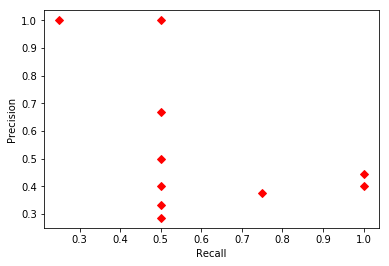

[1.   1.   0.75 0.5  0.5  0.5  0.5  0.5  0.5  0.25]
[0.4        0.44444444 0.44444444 0.44444444 0.44444444 0.44444444
 0.5        0.66666667 1.         1.        ]


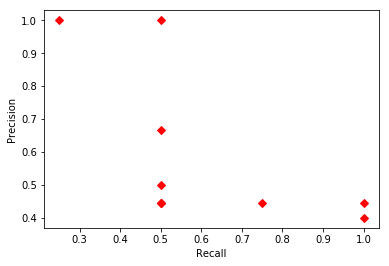

[1.         1.         1.         1.         1.         1.
 0.44444444 0.44444444 0.44444444 0.44444444 0.44444444]


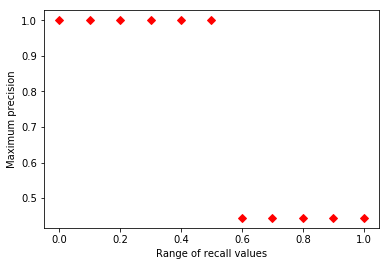

0.7474747474747475


In [6]:
# Average precision calculation demonstration
# Try index 1100, that is representative

recall = top_k_accuracies_recall[1100, :]
precision = top_k_accuracies_classical[1100, :]
print (recall)
print (precision)

# Just plot the recall, precision values
plt.figure()
plt.plot(recall, precision, 'rD')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Flat out the variation (not used in any calculations!)
index = (recall).argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector recall)
recall = recall[index]
precision = precision[index]
for i in range (0, recall.shape[0], 1):
    precision[i] = np.max(precision[:(i+1)])
print (recall)
print (precision)

plt.figure()
plt.plot(recall, precision, 'rD')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Calculate the mean average precision values
recall = top_k_accuracies_recall[1100, :]
precision = top_k_accuracies_classical[1100, :]

index = (recall).argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector recall)
recall = recall[index]
precision = precision[index]
recall_range = np.arange(0, 1.1, 0.1)
precision_range = np.zeros((recall_range.shape))
for i in range (0, recall_range.shape[0], 1):
    if (precision[recall>=recall_range[i]].size != 0):
        precision_range[i] = np.max(precision[recall>=recall_range[i]])
    else:     
        precision_range[i] = 0
print (precision_range)

plt.figure()
plt.plot(recall_range, precision_range, 'rD')
plt.xlabel('Range of recall values')
plt.ylabel('Maximum precision')
plt.show()

ap = np.mean(precision_range)
print (ap)

In [7]:
count = 0
average_precisions = np.zeros((query_labels.shape))
for j in range (0, query_labels.shape[0], 1):
    recall = top_k_accuracies_recall[j, :]
    precision = top_k_accuracies_classical[j, :]
    index = (recall).argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector recall)
    recall = recall[index]
    precision = precision[index]
    recall_range = np.arange(0, 1.1, 0.1)
    precision_range = np.zeros((recall_range.shape))
    for i in range (0, recall_range.shape[0], 1):    
        if (precision[recall>=recall_range[i]].size != 0):
            precision_range[i] = np.max(precision[recall>=recall_range[i]])
        else:     
            precision_range[i] = 0
    average_precisions[j] = np.mean(precision_range)
print (average_precisions, average_precisions.shape)
print (average_precisions.mean())

[0.         0.03636364 1.         ... 0.5        0.94545455 0.85454545] (1400,)
0.4353663677592249


NameError: name 'filelist' is not defined

In [8]:
from sklearn.cluster import KMeans

k_means_predictions = np.zeros((query_labels.shape[0]))
for i in range (0, query_labels.shape[0], 1):
    gallery_feat_removed, gallery_labels_removed = get_removed_gallery (i)
    kmeans = KMeans(n_clusters=((np.unique(gallery_labels_removed)).shape[0]), n_init=1, max_iter=10, random_state=0, precompute_distances= True).fit(gallery_feat_removed)
    k_means_predictions[i] = kmeans.predict(query_feat[i:(i+1), :])
    print (i)
    print (k_means_predictions[i], query_labels[i])
accuracy = (np.sum(k_means_predictions == query_labels))/(query_labels.shape[0])
print (accuracy)
print(k_means_predictions, k_means_predictions.shape, query_labels, query_labels.shape)

0
413.0 3
1
69.0 3
2
419.0 6
3
619.0 6
4
549.0 7


KeyboardInterrupt: 

In [12]:
from sklearn.cluster import KMeans

import sklearn.utils.linear_assignment_ as la
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import normalized_mutual_info_score

def best_map(l1, l2):
    """
    Permute labels of l2 to match l1 as much as possible
    """
    if len(l1) != len(l2):
        print("L1.shape must == L2.shape")
        exit(0)

    label1 = np.unique(l1)
    n_class1 = len(label1)

    label2 = np.unique(l2)
    n_class2 = len(label2)

    n_class = max(n_class1, n_class2)
    G = np.zeros((n_class, n_class))

    for i in range(0, n_class1):
        for j in range(0, n_class2):
            ss = l1 == label1[i]
            tt = l2 == label2[j]
            G[i, j] = np.count_nonzero(ss & tt)

    A = la.linear_assignment(-G)

    new_l2 = np.zeros(l2.shape)
    for i in range(0, n_class2):
        new_l2[l2 == label2[A[i][1]]] = label1[A[i][0]]
    return new_l2.astype(int)

k_means_predictions = np.zeros((query_labels.shape[0]))

kmeans = KMeans (n_clusters=np.unique(gallery_labels).shape[0], n_init =1, max_iter = 10, random_state = 0, precompute_distances=True).fit(gallery_feat)

labels = best_map(gallery_labels, kmeans.labels_)

#for i in range (0, query_labels.shape[0], 1):
#    k_means_predictions[i] = kmeans.predict(query_feat[i:(i+1), :])
#    print (i)
#    print (k_means_predictions[i], query_labels[i])
#accuracy = (np.sum(k_means_predictions == labels))/(query_labels.shape[0])
#print (accuracy)
#print(k_means_predictions, k_means_predictions.shape, query_labels, query_labels.shape)

0
63.0 3
1
497.0 3
2
398.0 6
3
619.0 6
4
437.0 7
5
203.0 7
6
482.0 11
7
482.0 11
8
384.0 14
9
384.0 14
10
33.0 17
11
33.0 17
12
379.0 22
13
379.0 22
14
43.0 28
15
43.0 28
16
214.0 30
17
214.0 30
18
430.0 32
19
430.0 32
20
452.0 33
21
696.0 33
22
459.0 34
23
164.0 34
24
677.0 35
25
42.0 35
26
501.0 38
27
695.0 38
28
370.0 40
29
370.0 40
30
454.0 41
31
646.0 41
32
488.0 42
33
76.0 42
34
522.0 45
35
404.0 45
36
134.0 47
37
134.0 47
38
63.0 51
39
63.0 51
40
255.0 54
41
171.0 54
42
523.0 55
43
523.0 55
44
127.0 58
45
127.0 58
46
189.0 60
47
189.0 60
48
347.0 62
49
347.0 62
50
430.0 68
51
234.0 68
52
255.0 69
53
259.0 69
54
125.0 70
55
125.0 70
56
83.0 72
57
83.0 72
58
218.0 74
59
194.0 74
60
164.0 76
61
387.0 76
62
130.0 77
63
130.0 77
64
182.0 78
65
182.0 78
66
150.0 80
67
150.0 80
68
116.0 81
69
528.0 81
70
216.0 86
71
689.0 86
72
588.0 89
73
561.0 89
74
81.0 91
75
81.0 91
76
469.0 96
77
51.0 96
78
320.0 98
79
377.0 98
80
303.0 99
81
303.0 99
82
439.0 100
83
315.0 100
84
421.0 101
85
421.

616
229.0 646
617
229.0 646
618
427.0 647
619
146.0 647
620
443.0 648
621
443.0 648
622
378.0 649
623
133.0 649
624
435.0 650
625
435.0 650
626
374.0 651
627
438.0 651
628
334.0 652
629
524.0 652
630
92.0 653
631
92.0 653
632
228.0 655
633
228.0 655
634
206.0 660
635
206.0 660
636
410.0 661
637
410.0 661
638
548.0 665
639
139.0 665
640
194.0 666
641
439.0 666
642
324.0 669
643
62.0 669
644
424.0 670
645
424.0 670
646
27.0 672
647
27.0 672
648
186.0 673
649
378.0 673
650
380.0 674
651
309.0 674
652
674.0 675
653
316.0 675
654
663.0 678
655
663.0 678
656
170.0 682
657
22.0 682
658
448.0 689
659
234.0 689
660
321.0 690
661
321.0 690
662
120.0 691
663
194.0 691
664
581.0 692
665
349.0 692
666
10.0 694
667
657.0 694
668
543.0 695
669
661.0 695
670
157.0 696
671
157.0 696
672
628.0 697
673
628.0 697
674
308.0 699
675
332.0 699
676
318.0 703
677
318.0 703
678
196.0 704
679
196.0 704
680
220.0 705
681
220.0 705
682
297.0 706
683
297.0 706
684
35.0 708
685
35.0 708
686
484.0 710
687
484.0 710
6

1237
672.0 1259
1238
685.0 1263
1239
685.0 1263
1240
351.0 1264
1241
237.0 1264
1242
183.0 1265
1243
183.0 1265
1244
87.0 1266
1245
698.0 1266
1246
46.0 1270
1247
106.0 1270
1248
210.0 1271
1249
177.0 1271
1250
231.0 1273
1251
153.0 1273
1252
90.0 1276
1253
395.0 1276
1254
300.0 1285
1255
115.0 1285
1256
263.0 1286
1257
263.0 1286
1258
449.0 1293
1259
449.0 1293
1260
473.0 1298
1261
584.0 1298
1262
449.0 1300
1263
449.0 1300
1264
328.0 1301
1265
328.0 1301
1266
77.0 1305
1267
147.0 1305
1268
241.0 1307
1269
241.0 1307
1270
89.0 1311
1271
89.0 1311
1272
254.0 1312
1273
254.0 1312
1274
640.0 1313
1275
420.0 1313
1276
337.0 1319
1277
560.0 1319
1278
92.0 1321
1279
92.0 1321
1280
554.0 1322
1281
554.0 1322
1282
266.0 1326
1283
697.0 1326
1284
505.0 1329
1285
505.0 1329
1286
101.0 1330
1287
362.0 1330
1288
240.0 1331
1289
615.0 1331
1290
101.0 1336
1291
362.0 1336
1292
647.0 1342
1293
647.0 1342
1294
418.0 1343
1295
418.0 1343
1296
578.0 1347
1297
147.0 1347
1298
570.0 1349
1299
570.0 1349


/Users/karolyhorvath/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [15]:
print (labels, gallery_labels, kmeans.labels_)
print (labels.shape, gallery_labels.shape, kmeans.labels_.shape)

[1426   51   51 ... 1463 1463 1463] [   3    3    3 ... 1463 1463 1463] [582  63  63 ... 178 178 178]
(5328,) (5328,) (5328,)


In [19]:
np.sum(labels==gallery_labels)

3604

In [5]:
from PIL import Image, ImageOps
def printranklist (queryid, nn_idx, is_same):
    plt.figure()
    plt.subplot(1,11,1)
    img = Image.open('PR_data/images_cuhk03/'+query_filelist[queryid].item(0))
    img_with_border = ImageOps.expand(img,border=5,fill='black')
    plt.imshow(img)

    for i in range (2, 12, 1):
        plt.subplot (1, 11, i)
        img = Image.open('PR_data/images_cuhk03/'+gallery_filelist[nnidx[i-2]].item(0))
        if (is_same[i-2]==True):
            fillcolour = 'green'
        else:
            fillcolour = 'red'
        img_with_border = ImageOps.expand(img,border=5,fill=fillcolour)
        plt.imshow(img_with_border)
    plt.show()
    return